In [1]:
#importing modules and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

2023-05-18 12:06:53.616019: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 12:06:53.653863: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-18 12:06:53.654647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 12:06:54.408488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#dir_paths  
main_dir='New Masks Dataset/'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')
train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [3]:
train_mask_names=os.listdir(train_mask_dir)
print("Mask:\n",train_mask_names[:5])

train_nomask_names=os.listdir(train_nomask_dir)
print("Non-Mask:\n",train_nomask_names[:5])


Mask:
 ['0190.jpg', '1103.png', '0505.jpg', '1346.jpg', '0211.jpg']
Non-Mask:
 ['261.jpg', '93.jpg', '280.jpg', '322.jpg', '226.jpg']


In [4]:
#normalization
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
        horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
valid_generator=train_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 626 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 317 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [7]:
model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])  


In [8]:
history=model.fit(train_generator,
                  epochs=12,
                  validation_data=valid_generator
)


Epoch 1/12


2023-05-18 12:06:56.452140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - ETA: 0s - loss: 2.4578 - accuracy: 0.5288

2023-05-18 12:07:14.346444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 24s 1s/step - loss: 2.4578 - accuracy: 0.5288 - val_loss: 0.6929 - val_accuracy: 0.5331
Epoch 2/12
20/20 [==============================] - 24s 1s/step - loss: 0.6172 - accuracy: 0.6629 - val_loss: 0.5810 - val_accuracy: 0.8486
Epoch 3/12
20/20 [==============================] - 24s 1s/step - loss: 0.3899 - accuracy: 0.8482 - val_loss: 0.4417 - val_accuracy: 0.8644
Epoch 4/12
20/20 [==============================] - 24s 1s/step - loss: 0.2664 - accuracy: 0.9089 - val_loss: 0.3402 - val_accuracy: 0.9022
Epoch 5/12
20/20 [==============================] - 27s 1s/step - loss: 0.2699 - accuracy: 0.8866 - val_loss: 0.3419 - val_accuracy: 0.8991
Epoch 6/12
20/20 [==============================] - 29s 1s/step - loss: 0.2422 - accuracy: 0.9265 - val_loss: 0.3169 - val_accuracy: 0.8864
Epoch 7/12
20/20 [==============================] - 29s 1s/step - loss: 0.1938 - accuracy: 0.9281 - val_loss: 0.2916 - val_accuracy: 0.8833
Epoch 8/12
20/20 [=============

In [9]:
test_loss,test_acc=model.evaluate(test_generator)
print('test acc : {} test loss : {}'.format(test_acc,test_loss))


2023-05-18 12:11:55.259202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 1s 274ms/step - loss: 0.2620 - accuracy: 0.8611
test acc : 0.8611111044883728 test loss : 0.2620367407798767


In [10]:
model.save('fmd_datamodel30_150_ib.h5')

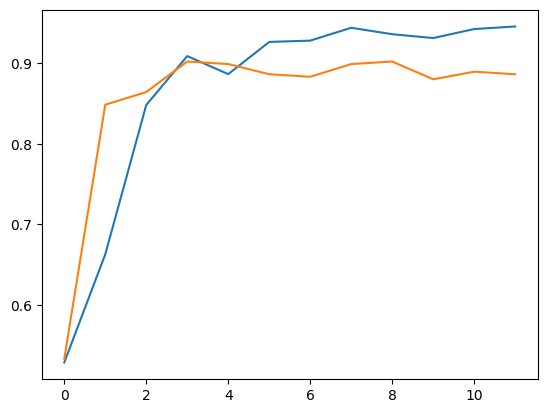

In [11]:
plt.plot(history.epoch,history.history["accuracy"])
plt.plot(history.epoch,history.history["val_accuracy"])
plt.show()

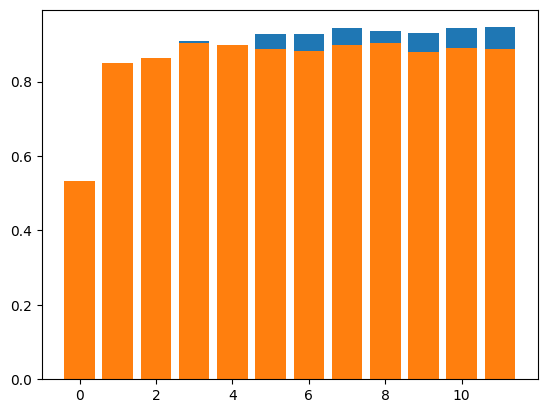

In [12]:
plt.bar(history.epoch,history.history["accuracy"])
plt.bar(history.epoch,history.history["val_accuracy"])
plt.show()

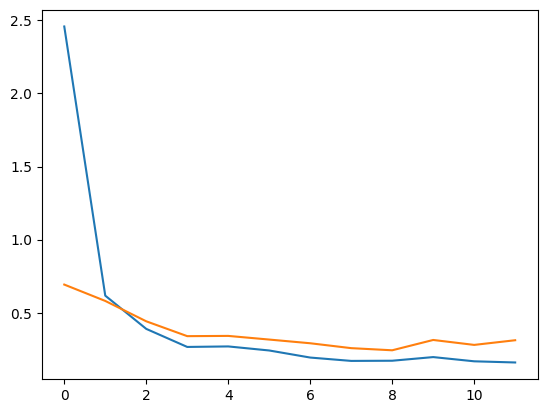

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()


In [ ]:
history.epoch